# SpatialOverlays

In the previous few lectures we have learned about spatial joins where we have essentially joined multiple datasets using their location and geometry in space. But what if we want to create a new geometry itself based on how multiple datasets overlap with each other. In such cases we use spatial overlays. 

![overlay](images/overlay-operations.svg)

Typical overlay operations include Intersection, Union, and Difference. Let us go through them one by one

In [ ]:
## Union 

In union all data regardless of the overlap are kept. 

![union](images/union.png)

Let us look at an example. 

We want to find out all the areas in Cleveland city that are served by starbucks and dunkin donuts (assuming every shop serves people with in 2 mile radius of its location). Let us load our datasets

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
starbucks = gpd.read_file('../../largedatasets/starbucks/starbucks.shp')
starbucks.head()

,pk_uid,geometry
0,1,POINT (-73.02315 40.82713)
1,2,POINT (-72.99688 40.82229)
2,3,POINT (-73.03259 40.77785)
3,4,POINT (-73.05505 40.86302)
4,5,POINT (-73.09551 40.78991)


Now let us load the dunkin donuts dataset

In [3]:
dunkin = pd.read_csv(r'../../largedatasets/dunkin/dunkin.csv')
dunkin.head()

,id,address,city,state,zip,country,lat,lng
0,300176,1752B Route 9,Clifton Park,NY,12065,US,42.871739,-73.774136
1,300178,99 High St,Danvers,MA,1923,US,42.559575,-70.931239
2,300179,17 Railroad Ave,Rockport,MA,1966,US,42.656344,-70.626211
3,300202,411 Furrows Rd,Holbrook,NY,11741,US,40.806919,-73.072950
4,300204,140 Central Ave,East Orange,NJ,7018,US,40.752378,-74.207983


Now we need to convert the DataFrame into a GeoDataFrame

In [5]:
dunkinGeo = gpd.GeoDataFrame(dunkin,geometry = gpd.points_from_xy(dunkin.lng,dunkin.lat),crs='EPSG:4326')
dunkinGeo.head()

,id,address,city,state,zip,country,lat,lng,geometry
0,300176,1752B Route 9,Clifton Park,NY,12065,US,42.871739,-73.774136,POINT (-73.77414 42.87174)
1,300178,99 High St,Danvers,MA,1923,US,42.559575,-70.931239,POINT (-70.93124 42.55958)
2,300179,17 Railroad Ave,Rockport,MA,1966,US,42.656344,-70.626211,POINT (-70.62621 42.65634)
3,300202,411 Furrows Rd,Holbrook,NY,11741,US,40.806919,-73.072950,POINT (-73.07295 40.80692)
4,300204,140 Central Ave,East Orange,NJ,7018,US,40.752378,-74.207983,POINT (-74.20798 40.75238)


In [6]:
dunkinGeo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
starbucks.crs

In [8]:
starbucks.crs = dunkinGeo.crs

Now we need to find out the starbucks and dunkin in Cleveland. 

In [9]:
clevelandBoundaries = gpd.read_file(r'..\..\largedatasets\cle_bounds\Cleveland_City_Boundaries_CPC.shp')

In [10]:
clevelandBoundaries.crs

<Derived Projected CRS: EPSG:3734>
Name: NAD83 / Ohio North (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Ohio - counties of Allen;Ashland; Ashtabula; Auglaize; Carroll; Columbiana; Coshocton; Crawford; Cuyahoga; Defiance; Delaware; Erie; Fulton; Geauga; Hancock; Hardin; Harrison; Henry; Holmes; Huron; Jefferson; Knox; Lake; Logan; Lorain; Lucas; Mahoning; Marion; Medina; Mercer; Morrow; Ottawa; Paulding; Portage; Putnam; Richland; Sandusky; Seneca; Shelby; Stark; Summit; Trumbull; Tuscarawas; Union; Van Wert; Wayne; Williams; Wood; Wyandot.
- bounds: (-84.81, 40.1, -80.51, 42.33)
Coordinate Operation:
- name: SPCS83 Ohio North zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
clevelandBoundaries = clevelandBoundaries.to_crs(dunkinGeo.crs)

Now let us use containment predicate to find out all the starbucks and dunkin donuts with in Cleveland

In [13]:
starbucksCleveland = starbucks[starbucks.within(clevelandBoundaries.geometry.values[0])]
starbucksCleveland.head()

,pk_uid,geometry
5306,5307,POINT (-81.84213 41.40740)
5307,5308,POINT (-81.83847 41.41201)
5324,5325,POINT (-81.77138 41.46817)
5333,5334,POINT (-81.76827 41.48720)
5334,5335,POINT (-81.68912 41.45833)


In [14]:
dunkinGeoCleveland = dunkinGeo[dunkinGeo.within(clevelandBoundaries.geometry.values[0])]
dunkinGeoCleveland.head()

,id,address,city,state,zip,country,lat,lng,geometry
2746,336756,16204 Lorain Ave,Cleveland,OH,44111,US,41.451009,-81.811466,POINT (-81.81147 41.45101)
5364,346315,230 W. Huron Rd,Cleveland,OH,44113,US,41.496809,-81.693654,POINT (-81.69365 41.49681)
5974,347711,4140 Lee Rd,Cleveland,OH,44128,US,41.447281,-81.565259,POINT (-81.56526 41.44728)
6236,348515,Cleveland Hopkin Int'l Airport,Cleveland,OH,44135,US,41.401453,-81.852506,POINT (-81.85251 41.40145)


Now we need to generate serving areas for these locations. For buffer we need to make sure the data is in projected coordinates (meters). 

<AxesSubplot:>

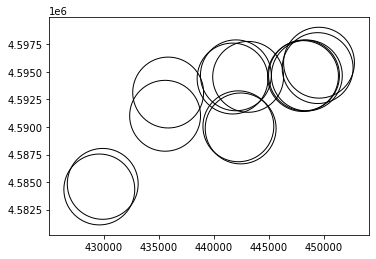

In [26]:
buffer = starbucksCleveland.to_crs('EPSG:26917').buffer(2*1609.34)
starbucksClevelandBuffer = starbucksCleveland.drop(columns=['geometry'])
starbucksClevelandBuffer['geometry'] = buffer
starbucksClevelandBuffer = gpd.GeoDataFrame(starbucksClevelandBuffer)
starbucksClevelandBuffer.plot(facecolor='none')

<AxesSubplot:>

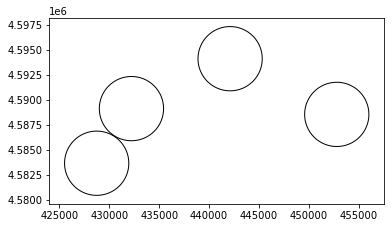

In [27]:
buffer = dunkinGeoCleveland.to_crs('EPSG:26917').buffer(2*1609.34)
dunkinBuffer = dunkinGeoCleveland.drop(columns=['geometry'])
dunkinBuffer['geometry'] = buffer
dunkinBuffer = gpd.GeoDataFrame(dunkinBuffer)
dunkinBuffer.plot(facecolor='none')

Let us plot both of these buffers together just for visualization

<AxesSubplot:>

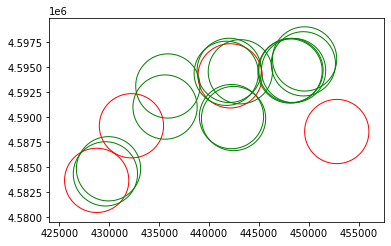

In [28]:
ax = dunkinBuffer.plot(facecolor='none',edgecolor = 'red')
starbucksClevelandBuffer.plot(facecolor='none',edgecolor = 'green',ax=ax)

Now let us extract out the union of the two datasets to find out all the area covered by both the coffee chains.

In [30]:
combined = gpd.overlay(dunkinBuffer, starbucksClevelandBuffer, how = 'union')
combined

,id,address,city,state,zip,country,lat,lng,pk_uid,geometry
0,336756.0,16204 Lorain Ave,Cleveland,OH,44111.0,US,41.451009,-81.811466,5307.0,"POLYGON ((432221.402 4585924.650, 431905.917 4..."
1,348515.0,Cleveland Hopkin Int'l Airport,Cleveland,OH,44135.0,US,41.401453,-81.852506,5307.0,"POLYGON ((431942.450 4583359.131, 431896.102 4..."
2,336756.0,16204 Lorain Ave,Cleveland,OH,44111.0,US,41.451009,-81.811466,5308.0,"POLYGON ((432849.336 4585986.496, 432536.888 4..."
3,348515.0,Cleveland Hopkin Int'l Airport,Cleveland,OH,44135.0,US,41.401453,-81.852506,5308.0,"POLYGON ((431942.450 4583359.131, 431896.102 4..."
4,336756.0,16204 Lorain Ave,Cleveland,OH,44111.0,US,41.451009,-81.811466,5325.0,"POLYGON ((435424.584 4588827.845, 435378.236 4..."
5,336756.0,16204 Lorain Ave,Cleveland,OH,44111.0,US,41.451009,-81.811466,5334.0,"POLYGON ((432849.336 4592300.164, 433155.736 4..."
6,346315.0,230 W. Huron Rd,Cleveland,OH,44113.0,US,41.496809,-81.693654,5334.0,"POLYGON ((439022.560 4593208.138, 438945.810 4..."
7,346315.0,230 W. Huron Rd,Cleveland,OH,44113.0,US,41.496809,-81.693654,5335.0,"POLYGON ((444590.718 4592100.562, 444378.595 4..."
8,346315.0,230 W. Huron Rd,Cleveland,OH,44113.0,US,41.496809,-81.693654,5336.0,"POLYGON ((444590.718 4592100.562, 444378.595 4..."
9,346315.0,230 W. Huron Rd,Cleveland,OH,44113.0,US,41.496809,-81.693654,5346.0,"POLYGON ((440060.735 4591654.398, 439826.694 4..."


Let us plot our combined dataset

<AxesSubplot:>

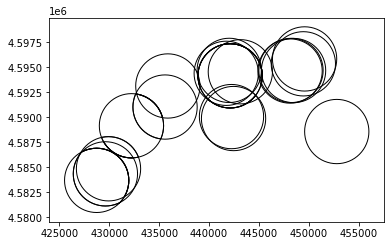

In [31]:
combined.plot(facecolor='none')

There are atleast three different attribute combination for the geometries

1. Starbucks alone

We can filter this out by checking starbucks not null and dunkin null

<AxesSubplot:>

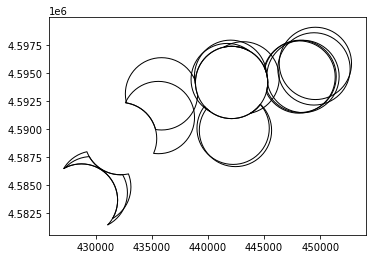

In [34]:
combined[(combined.pk_uid.notna())&(combined.id.isnull())].plot(facecolor='none')

2. Dunkin alone

<AxesSubplot:>

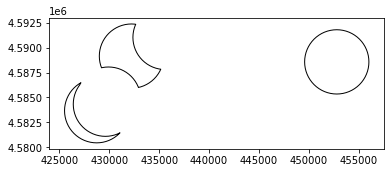

In [35]:
combined[(combined.pk_uid.isnull())&(combined.id.notna())].plot(facecolor='none')

3. Served by both starbucks and dunkin

<AxesSubplot:>

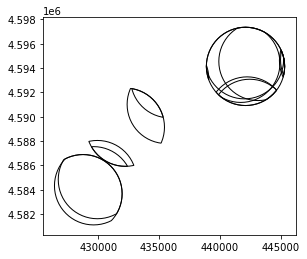

In [36]:
combined[(combined.pk_uid.notna())&(combined.id.notna())].plot(facecolor='none')

## Intersection

For intersection overlay only the areas where all dataset contain data are combined together. 

![intersection](images/intersection.png)

Let us take the same exmple, but the question we are going to ask is, 

Find the areas in Celveland that are served by both starbucks and dunkin.

In [ ]:
Since we have the buffers we can use that. 

In [38]:
intersection = gpd.overlay(dunkinBuffer, starbucksClevelandBuffer, how = 'intersection')
intersection

,id,address,city,state,zip,country,lat,lng,pk_uid,geometry
0,336756,16204 Lorain Ave,Cleveland,OH,44111,US,41.451009,-81.811466,5307,"POLYGON ((432221.402 4585924.650, 431905.917 4..."
1,348515,Cleveland Hopkin Int'l Airport,Cleveland,OH,44135,US,41.401453,-81.852506,5307,"POLYGON ((431942.450 4583359.131, 431896.102 4..."
2,336756,16204 Lorain Ave,Cleveland,OH,44111,US,41.451009,-81.811466,5308,"POLYGON ((432849.336 4585986.496, 432536.888 4..."
3,348515,Cleveland Hopkin Int'l Airport,Cleveland,OH,44135,US,41.401453,-81.852506,5308,"POLYGON ((431942.450 4583359.131, 431896.102 4..."
4,336756,16204 Lorain Ave,Cleveland,OH,44111,US,41.451009,-81.811466,5325,"POLYGON ((435424.584 4588827.845, 435378.236 4..."
5,336756,16204 Lorain Ave,Cleveland,OH,44111,US,41.451009,-81.811466,5334,"POLYGON ((432849.336 4592300.164, 433155.736 4..."
6,346315,230 W. Huron Rd,Cleveland,OH,44113,US,41.496809,-81.693654,5334,"POLYGON ((439022.560 4593208.138, 438945.810 4..."
7,346315,230 W. Huron Rd,Cleveland,OH,44113,US,41.496809,-81.693654,5335,"POLYGON ((444590.718 4592100.562, 444378.595 4..."
8,346315,230 W. Huron Rd,Cleveland,OH,44113,US,41.496809,-81.693654,5336,"POLYGON ((444590.718 4592100.562, 444378.595 4..."
9,346315,230 W. Huron Rd,Cleveland,OH,44113,US,41.496809,-81.693654,5346,"POLYGON ((440060.735 4591654.398, 439826.694 4..."


<AxesSubplot:>

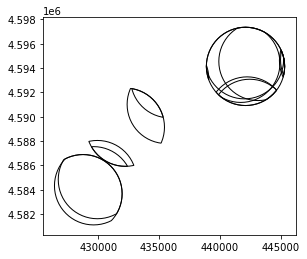

In [39]:
intersection.plot(facecolor='None')

## Difference (Erase)

For difference overlay the areas covered by the second dataset is used to "cut out" or erase those corresponding areas in the first dataset. In other words, only the areas in the first dataset that do not overlap with the second dataset are kept.

![erase](images/erase.png)

Let us stick with the same example. 

We want to select areas that are exclusively covered by starbucks (not dunkin).

[]

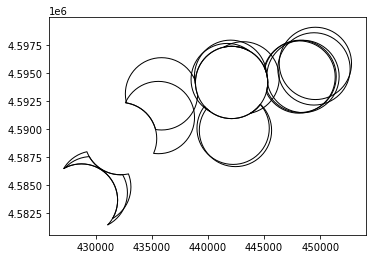

In [41]:
starbucksAlone = gpd.overlay(starbucksClevelandBuffer,dunkinBuffer, how = 'difference').plot(facecolor='none')
starbucksAlone.plot(facecolor='none')

In the next chapter of this lecture we are going to cover reverse geocoding (which we haven't covered in Lecture 9)